<a href="https://colab.research.google.com/github/Shahfaisal8678/Capstone-project-EDA-Hotel-Booking-Analysis/blob/main/BIke_sharing_demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Project Title : Seoul Bike Sharing Demand Prediction (Regression)***

**Name- Shah Faisal**

**Individual**

# **Problem Description**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:

*   Date : year-month-day

*   Rented Bike count - Count of bikes rented at each hour
*   Hour - Hour of he day
*   Temperature-Temperature in Celsius
*   Humidity - %
*   Windspeed - m/s
*   Visibility - 10m
*   Dew point temperature - Celsius
*   Solar radiation - MJ/m2
*   Rainfall - mm
*   Snowfall - cm
*   Holiday - Holiday/No holiday
*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



# ***Github Link***

https://github.com/Shahfaisal8678/Seoul-Bike-Sharing-Demand-Prediction-Regression-.git

In [2]:
#importing library that are provided
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding="latin")

In [4]:
#let's see first five rows of the data
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

# ***EDA(Expolratory Data Analysis)***

## **Data Summary and Overview**

In [5]:
#let's see five rows of the data set
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
# Last five rows of the data
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [7]:
#shape of the datasets
df.shape

(8760, 14)

In [8]:
#let's check missing value of the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

we found that there is no null value in our dataset

In [9]:
#check the duplicate value
df.duplicated().sum()

0

In [10]:
#description of the dataset to get insights of the data
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [11]:
#check details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We found that date comlumn shows object type we need to convert into date time format.


In [12]:
#Let's convert date column to year, month,day  column
df["Date"]=pd.to_datetime(df["Date"])

df["weekdays"] = df["Date"].dt.day_name()
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

df.drop("Date",axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekdays                   8760 non-null   objec

In [14]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  weekdays  \
0           0.0            0.0  Winter  No Holiday             Yes  Thursday   
1           0.0            0.0  Winter  No Holiday             Yes  Thursday   
2           0.0            0.0  Winter  No Holiday             Yes  Thursday   
3           0.0            0.0  Winter  No Holiday             Yes  Thursday   
4           0.0            0.0  Winter  No Holiday             Yes  Thursday   

   year  month  day  
0  2017      1   12  
1  2017      1   12  
2  2017      1   12  
3  2017      1   12  
4  2017      1   12

we can see three new column added in our dataset day, month, year and weakday.

In [15]:
#Let's know some statistical information of the dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)         year  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068  2017.915068   
std                   0.868746      1.128193       0.436746     0.278796   
min                   0.000000      0.000000       0.000000  2017.000000   
25%                   0.000000      0.000000       0.000000  2018.000000   
50%                   0.010000      0.000000       0.000000  2018.000000   
75%                   0.930000      0.000000       0.000000  2018.000000   
max                   3.520000     35.000000       8.800000  2018.000000   

             month          day  
count  8760.000000  8760.000000  
mean      6.526027    15.720548  
std       3.448048     8.796749  
min       1.000000     1.000000  
25%       4.000000     8.000000  
50%       7.000000    16.000000  
75%      10.000000    23.000000  
max      12.000000    31.000000

In [16]:
df.describe(include='all').T

count unique         top  freq         mean  \
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   
weekdays                     8760      7      Sunday  1296          NaN   
year                       8760.0    NaN         NaN   NaN  2017.915068   
month                      8760.0    NaN         NaN   NaN     6.526027   
day                        8760.0    NaN         NaN   NaN    15.720548   

                                  std     min     25%     50%      75%     max  
Rented Bike Count          644.997468     0.0   191.0   504.5  1065.25  3556.0  
Hour                         6.922582     0.0    5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825   -17.8     3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413     0.0    42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363     0.0     0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712    27.0   940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369   -30.6    -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746     0.0     0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193     0.0     0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746     0.0     0.0     0.0      0.0     8.8  
Seasons                           NaN     NaN     NaN     NaN      NaN     NaN  
Holiday                           NaN     NaN     NaN     NaN      NaN     NaN  
Functioning Day                   NaN     NaN     NaN     NaN      NaN     NaN  
weekdays                          NaN     NaN     NaN     NaN      NaN     NaN  
year                         0.278796  2017.0  2018.0  2018.0   2018.0  2018.0  
month                        3.448048     1.0     4.0     7.0     10.0    12.0  
day                          8.796749     1.0     8.0    16.0     23.0    31.0

In [17]:
#check if there any missing values in our dataset
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
weekdays                     0
year                         0
month                        0
day                          0
dtype: int64

# ***Visualization***

### **Univariate, Bivariate and Multivariate Analysis**

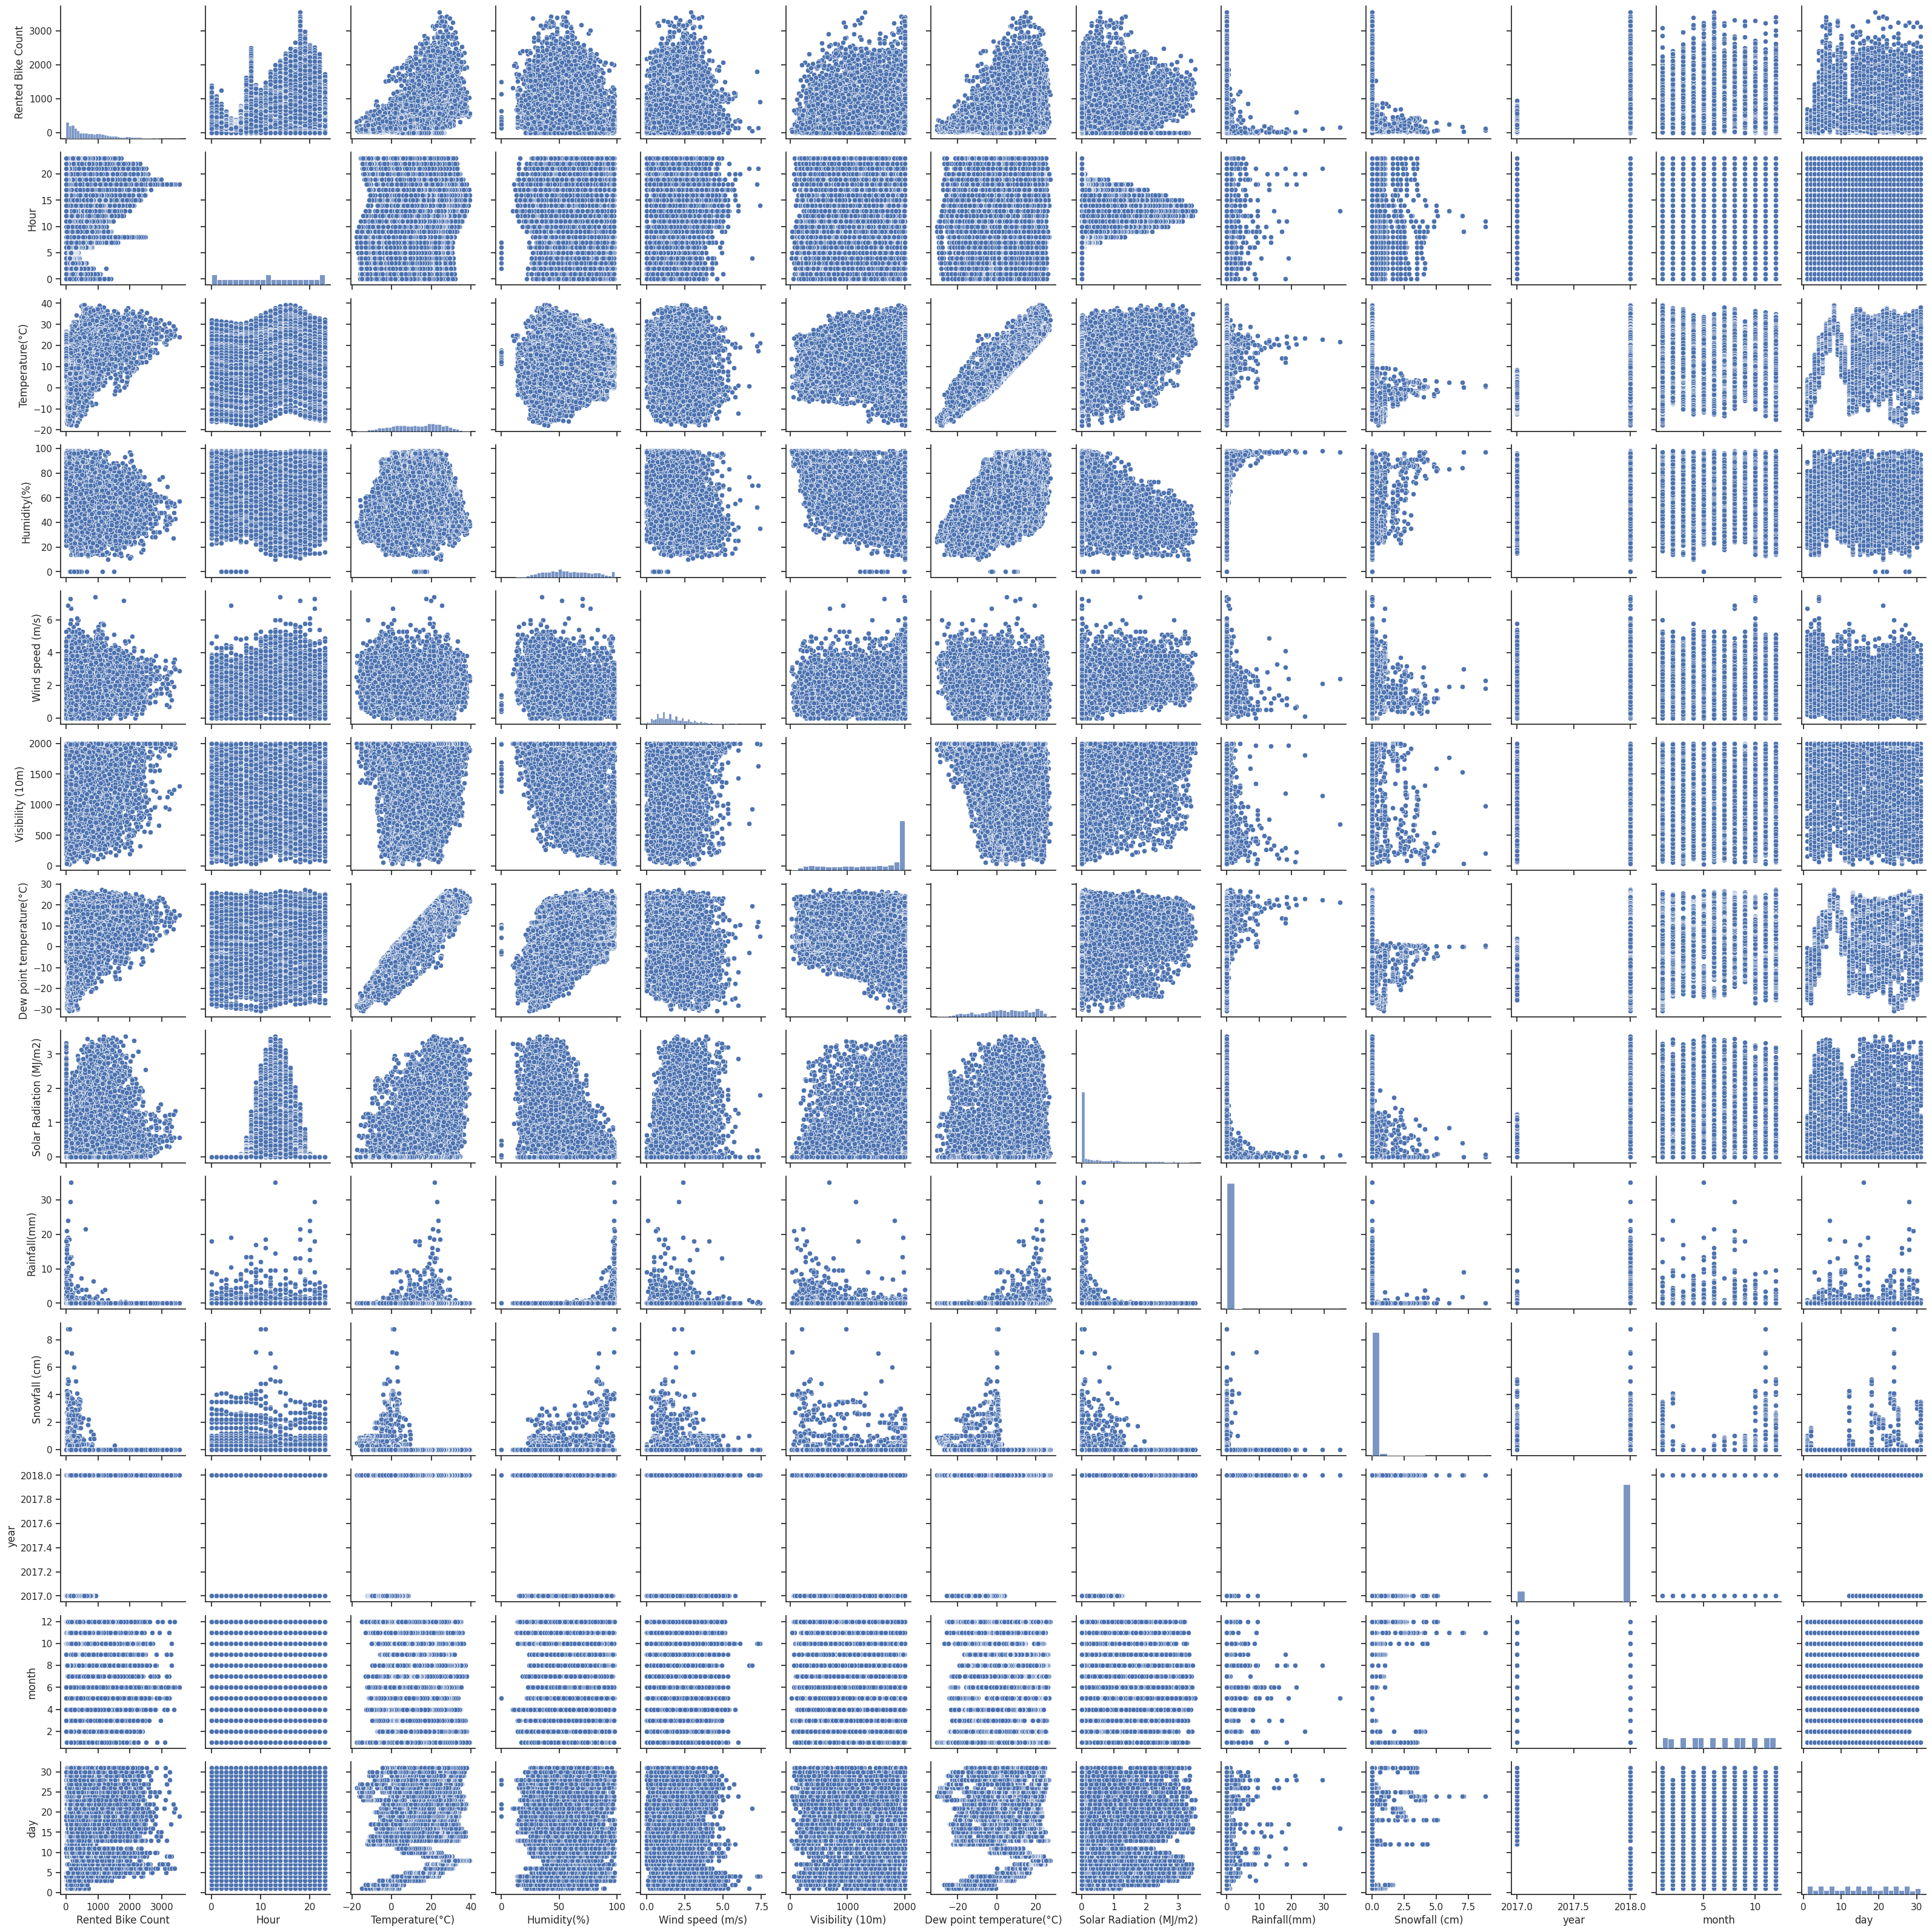

In [18]:
# Create a pair plot using seaborn
sns.set(style="ticks")
sns.pairplot(df)

# Show the plot
plt.show()


Here we can see using this pair plot all columns distribution.

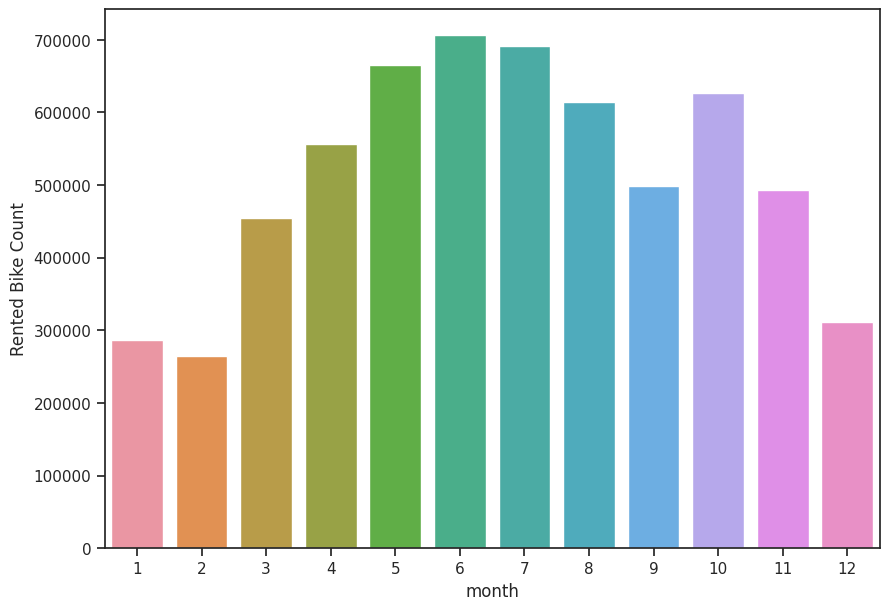

In [19]:
#using bar plot find how many bike rented monthly
plt.figure(figsize=(10,7))
Month=df.groupby("month").sum().reset_index()
sns.barplot(x='month',y='Rented Bike Count',data=Month)
plt.show()

Here we can easily see in winter bike rented this season are less.

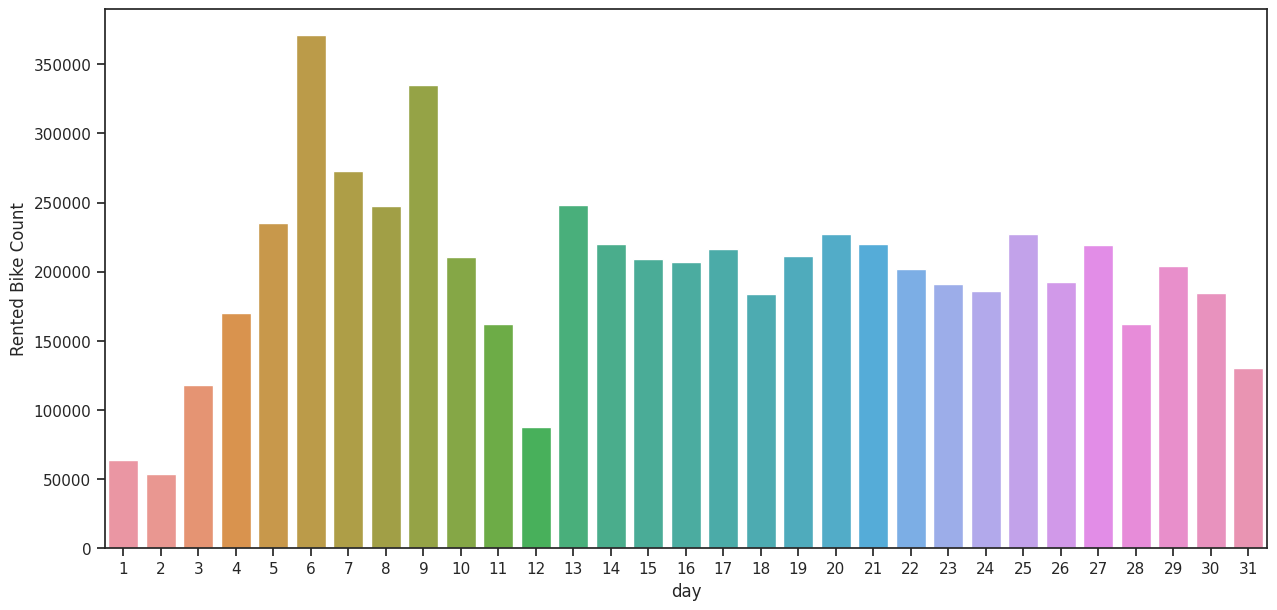

In [20]:
#Let's see per day rented bike count in month
plt.figure(figsize=(15,7))
Day =df.groupby('day').sum().reset_index()
sns.barplot(x="day",y= "Rented Bike Count",data=Day)
plt.show()



Here we can see 6th and 9th day rented bike count is high and 1st and second day rented bike count is very less

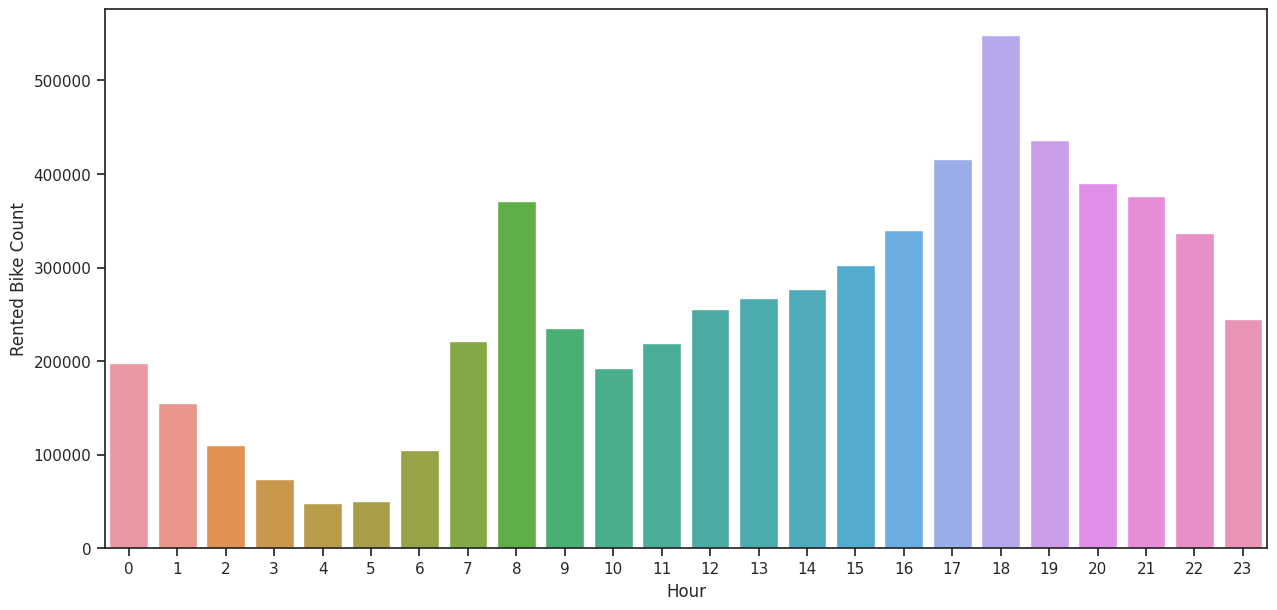

In [21]:
#Let's see how many bike boking a perticular hour
plt.figure(figsize=(15,7))
Hour =df.groupby('Hour').sum().reset_index()
sns.barplot(x="Hour",y= "Rented Bike Count",data=Hour)
plt.show()

Above plot shows the use of rented bike hourly and we found that usually people use rented bikes during their working hours from 7 am to 9 am and 5 pm to 7 pm.

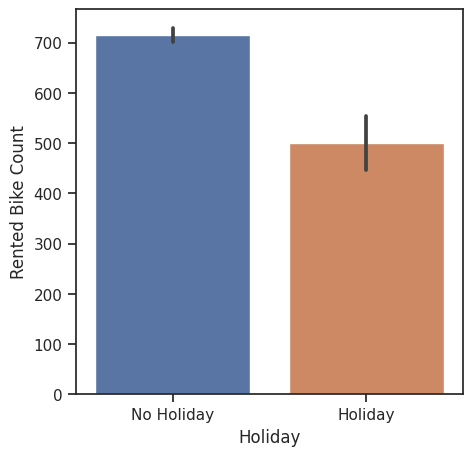

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(x="Holiday",y= "Rented Bike Count",data=df)
plt.show()

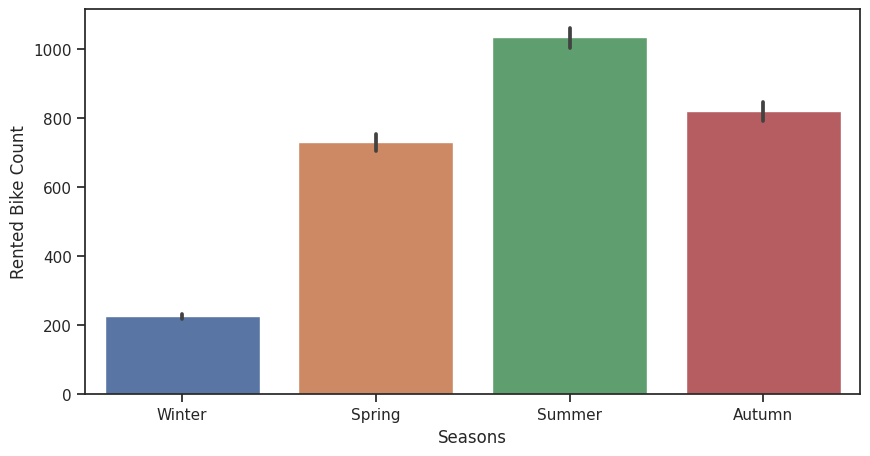

In [23]:
# Data visualization of the booking of rented bikes according to seasons
plt.figure(figsize=(10,5))
sns.barplot(x="Seasons",y= "Rented Bike Count",data=df)
plt.show()

Here we can see in winter season rented bike count is very less, and summer season rented bike count is very high.

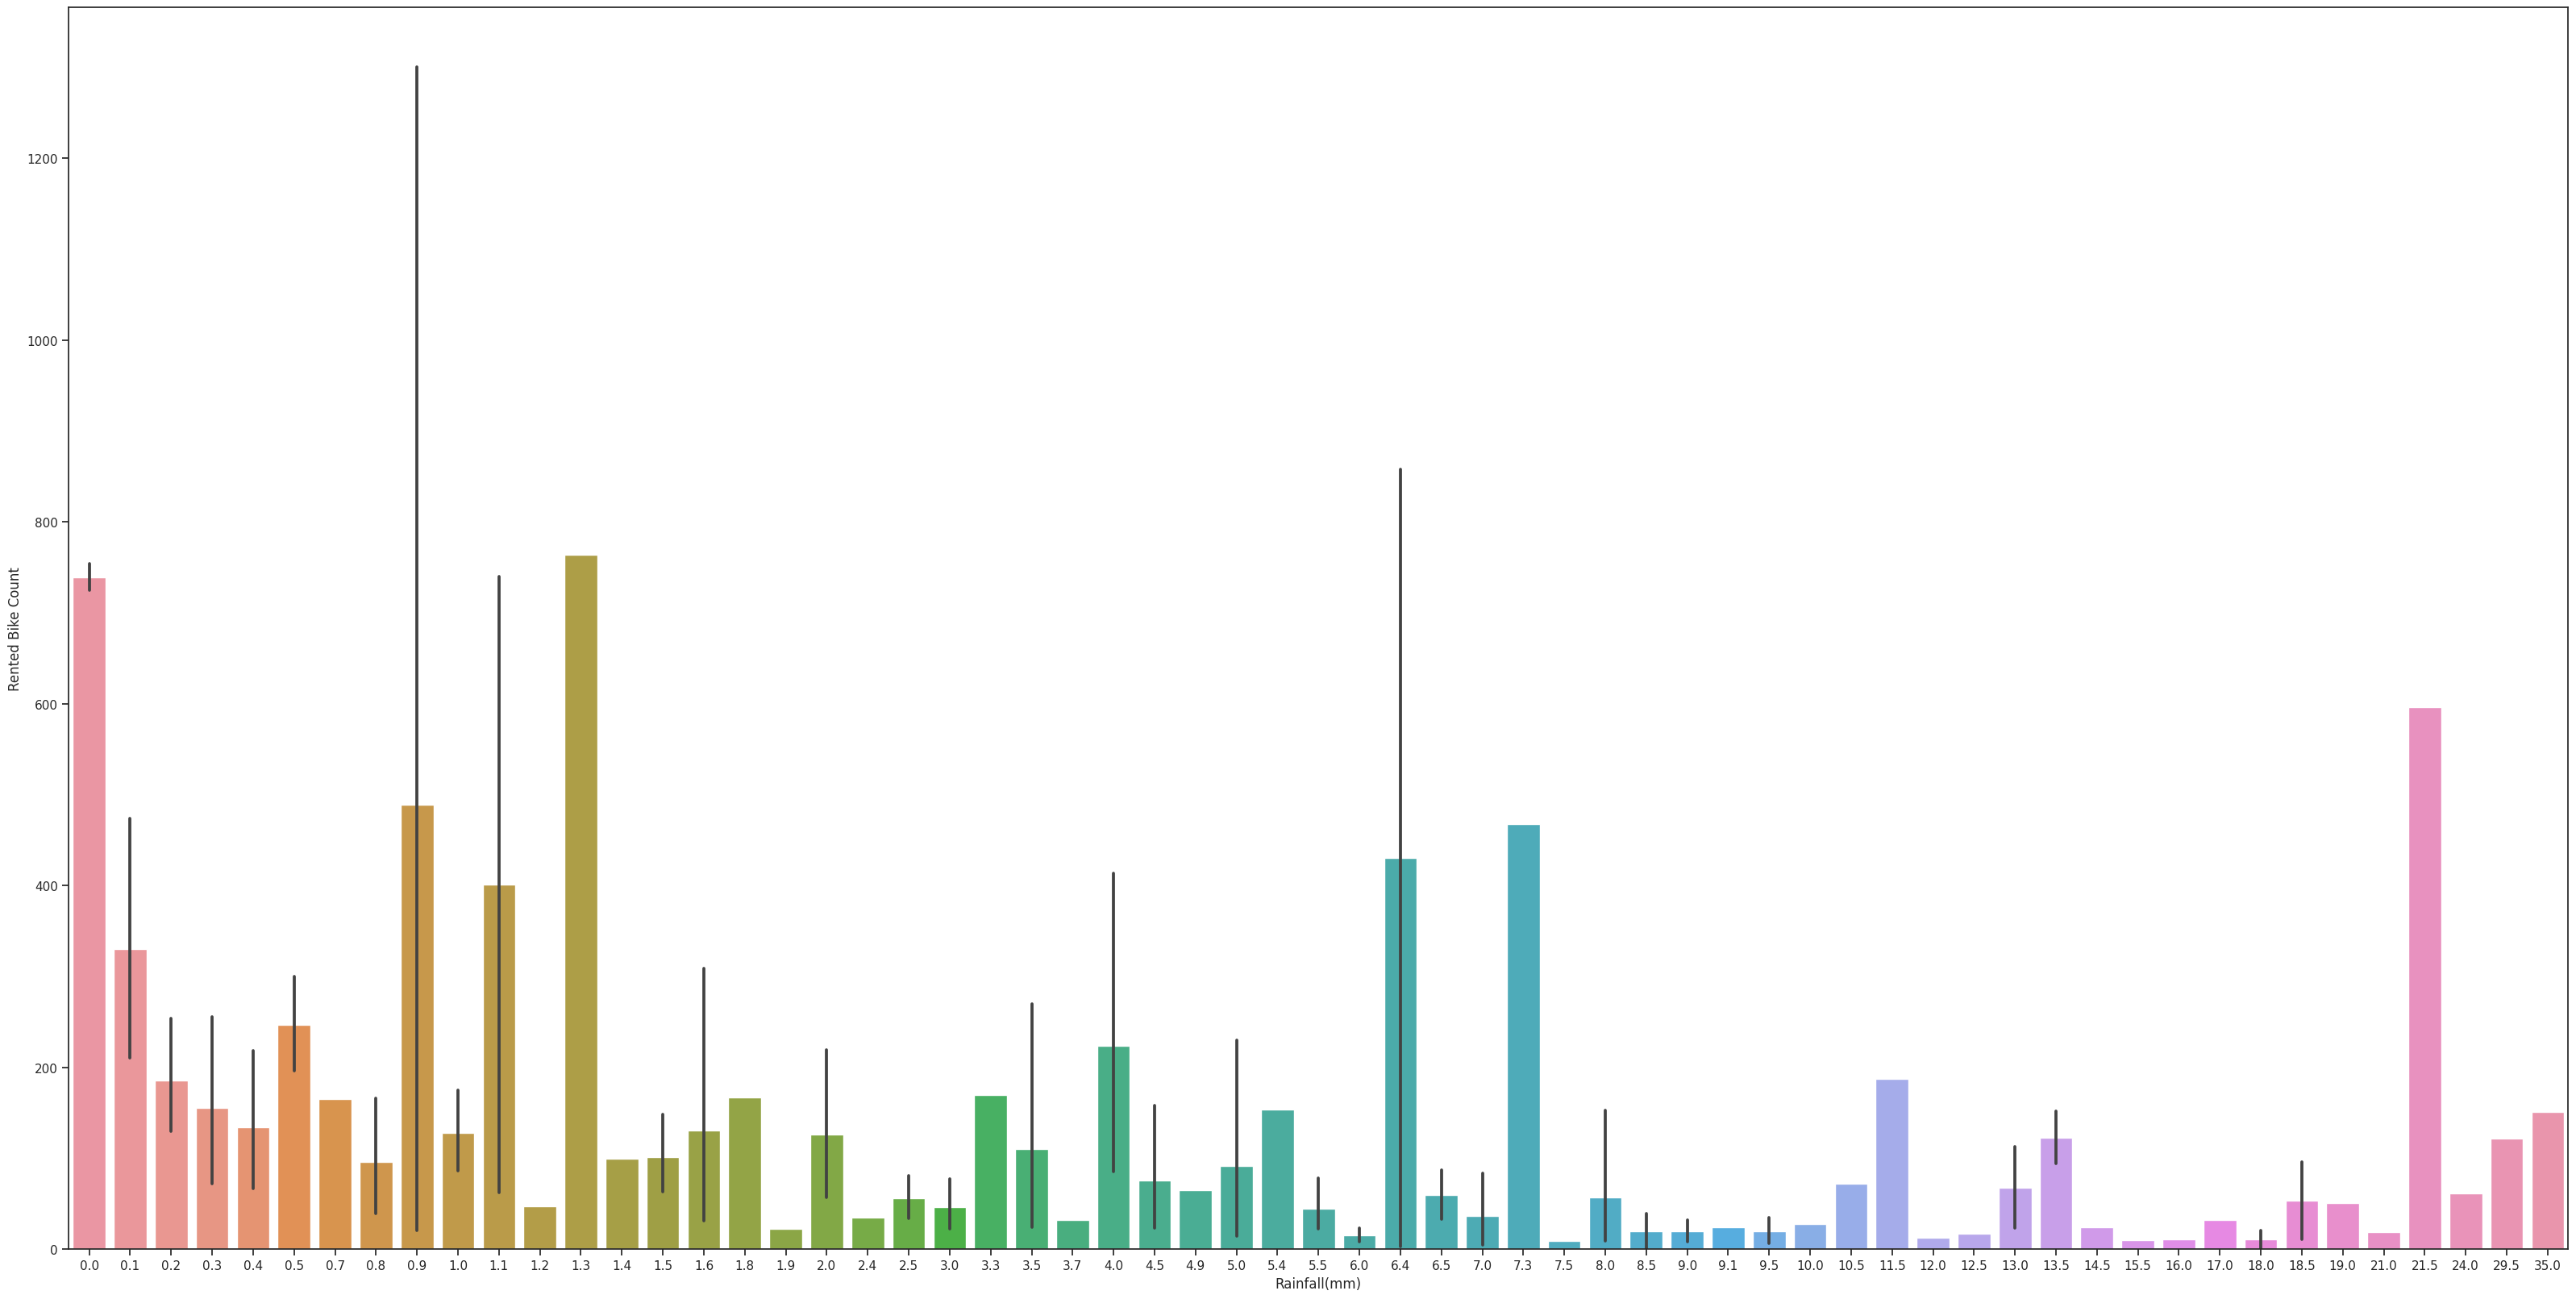

In [24]:
#Let's visualize rented bike count according to rainfall
plt.figure(figsize=(40,20))
sns.barplot(x="Rainfall(mm)",y= "Rented Bike Count",data=df)
plt.show()



Here we can see above this bar plot if rainfall is high then rented bike count is less.

**Countplot**

array([2208, 2208, 2184, 2160])

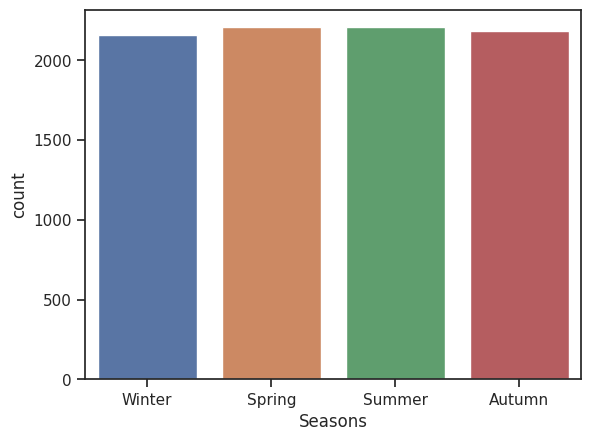

In [25]:
#Let's see seasons count
sns.countplot(x=df["Seasons"])
values=df['Seasons'].value_counts().values
values

Here we can see every season almost equally distributed.

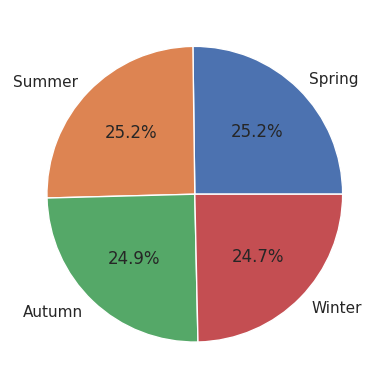

In [26]:
#Now plotting percentages all the catogories using piechart
data = [2208, 2208, 2184, 2160]
keys = ['Spring', 'Summer', 'Autumn', 'Winter',]
plt.pie(data, labels=keys, autopct='%1.1f%%')
plt.show()

we can se there are four class of season Every season has almost equal no of distribution.

array([8328,  432])

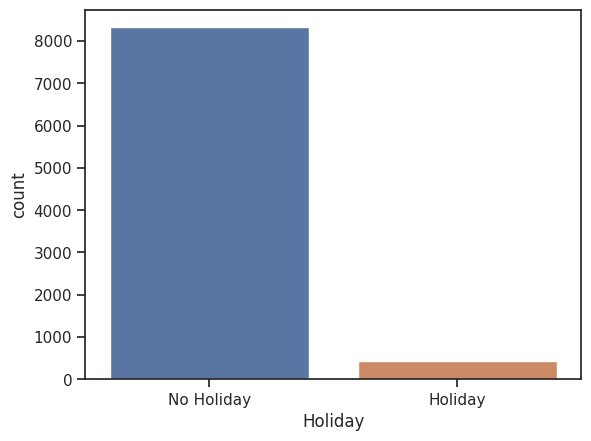

In [27]:
#Let us visualize the number of holiday and not holiday.
sns.countplot(x=df['Holiday'])
values=df['Holiday'].value_counts().values
values


Here we can see 8328 days no holidays and 432 days is holidays.

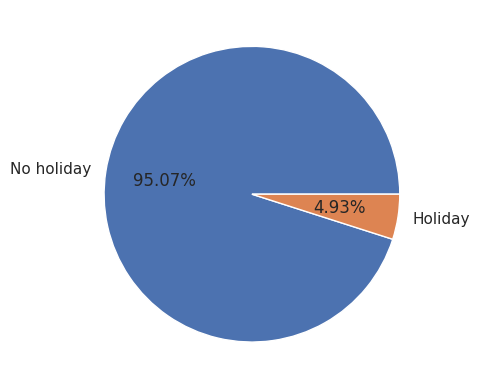

In [28]:
#plotting holiday and non-holidays percentage using pie chart
data = [8328,  432]
keys = ['No holiday','Holiday']
plt.pie(data, labels=keys, autopct='%.2f%%')
plt.show()

Using this piechart we can see 95% of the No holidays and 5% of the holidays.

array([8465,  295])

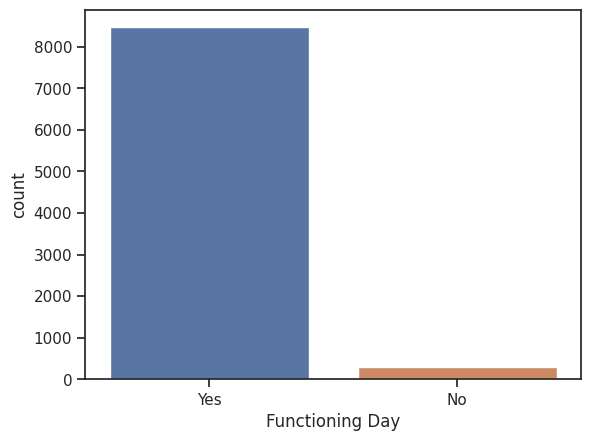

In [29]:
#Let us visualize the Functioning Day catogories in our dataset.
sns.countplot(x=df['Functioning Day'])
values=df['Functioning Day'].value_counts().values
values

Here we can see Percentages of all the seasons present in our data datasets.

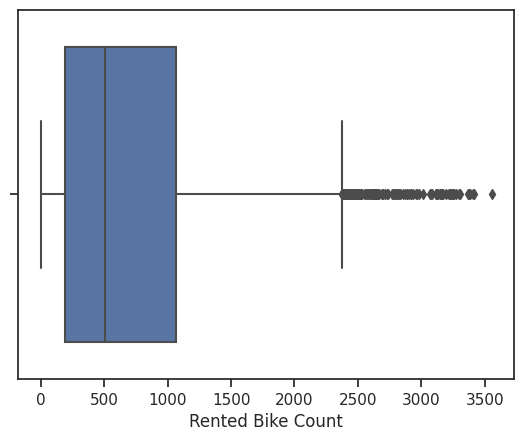

In [30]:
#Let's check outlier in our dataset using box plot of Ranted Bike count
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

So this boxplot shows that we have outliers in our dataset,and outliers can impact in our Machine Learning model.So we have to remove these outliers first.

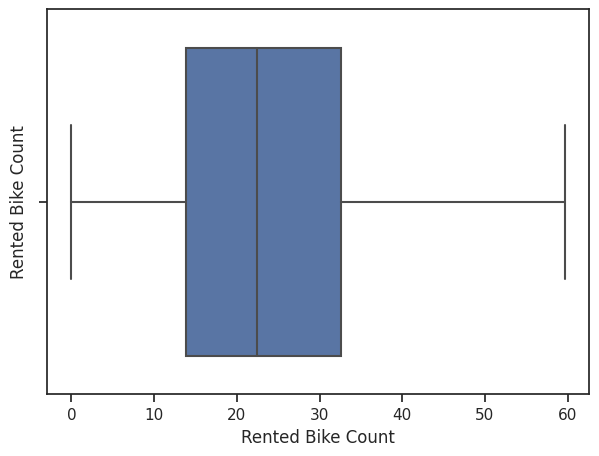

In [31]:
#remove outlier using square root
plt.figure(figsize=(7,5))
plt.ylabel("Rented Bike Count")
sns.boxplot(x=np.sqrt(df["Rented Bike Count"]))
plt.show()

Here we can see there is no outlier in our dataset

**Bivariate Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

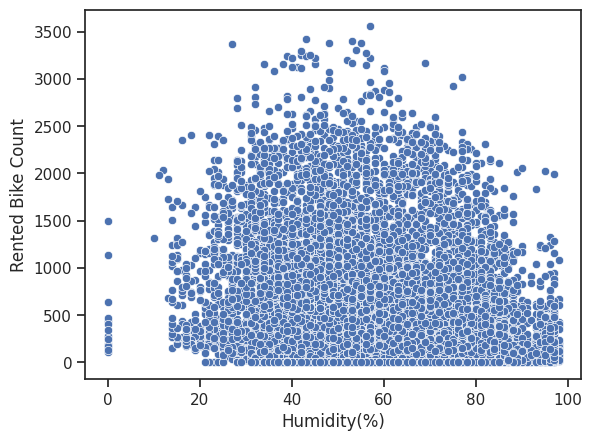

In [32]:
sns.scatterplot(x=df['Humidity(%)'],y=df['Rented Bike Count'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

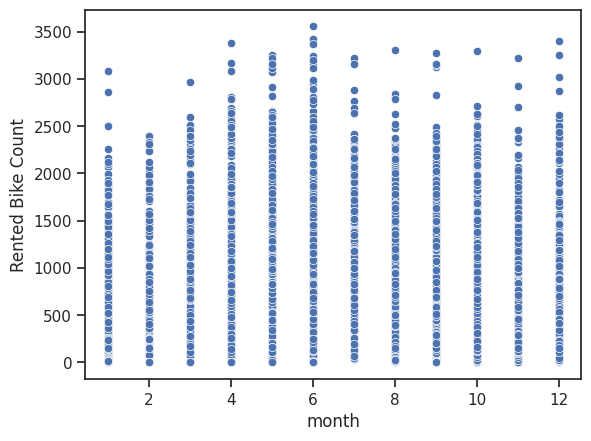

In [33]:
sns.scatterplot(x=df['month'],y=df['Rented Bike Count'])
plt.show

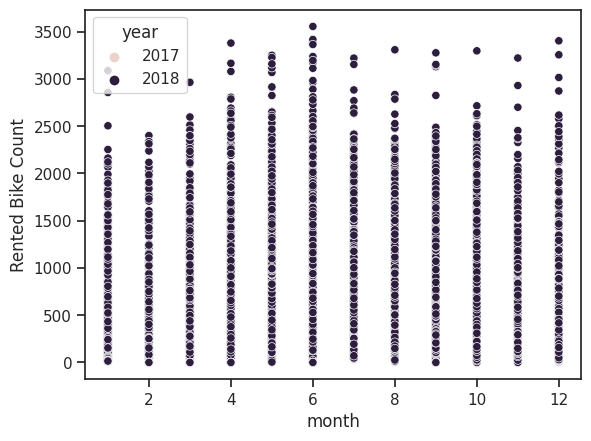

In [34]:
sns.scatterplot(x=df['month'],y=df['Rented Bike Count'],hue=df['year'])
plt.show()

<Axes: xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

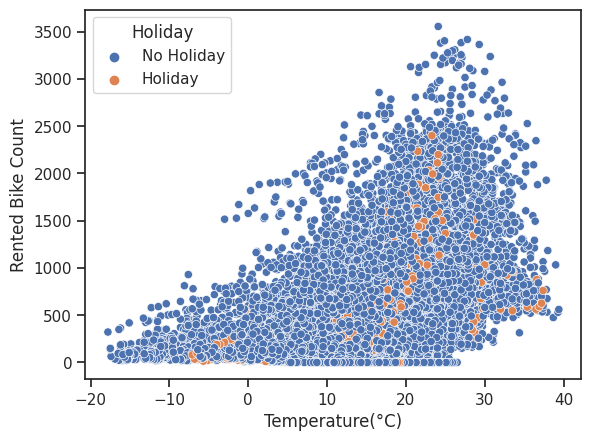

In [35]:
sns.scatterplot(x=df['Temperature(°C)'],y=df['Rented Bike Count'],hue=df['Holiday'])

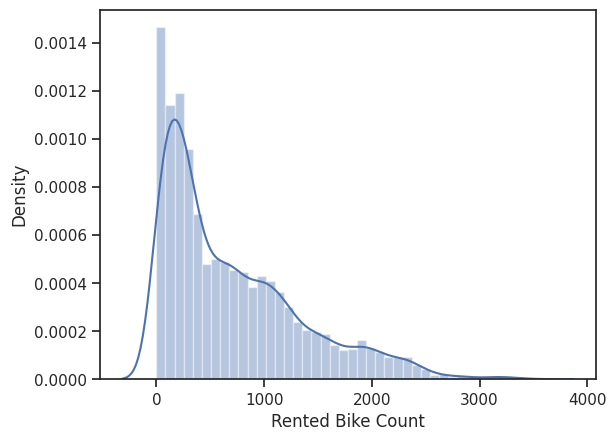

In [36]:
sns.distplot(df['Rented Bike Count'])
plt.show()

From above distplot we shows that our data is Right Skewed,it means our data is positively skewed.

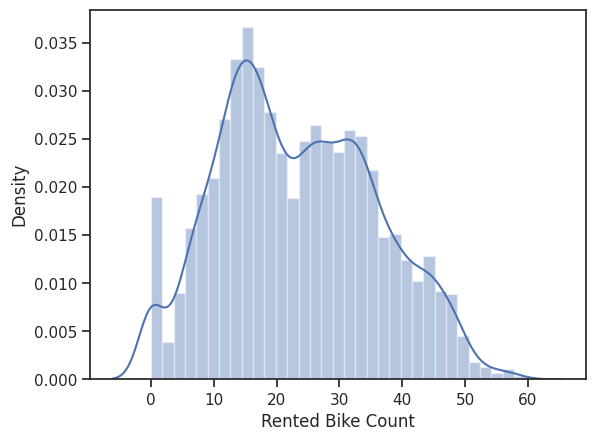

In [37]:
#Take square root to make our data normally distributed
sns.distplot(np.sqrt(df["Rented Bike Count"]))
plt.show()

From above distplot we can see that now our data is approx normally distributed.Which is good for us.

**Skewed data**

In [38]:
#Let's check skewed data distribution
df.skew().sort_values(ascending=True)

year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
month                        -0.010458
Hour                          0.000000
day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [39]:
df.corr()

Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
year                                0.215162  2.336763e-14         0.377796   
month                               0.070861  1.036729e-15         0.049683   
day                                 0.046849  4.206322e-16         0.080908   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
year                          0.035925         -0.003781          0.052381   
month                         0.047798         -0.082069          0.077888   
day                           0.007047         -0.061234         -0.106859   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
year                                        0.336350                 0.128086   
month                                       0.065101                -0.030412   
day                                         0.069708                -0.003446   

                           Rainfall(mm)  Snowfall (cm)          year  \
Rented Bike Count             -0.123074      -0.141804  2.151618e-01   
Hour                           0.008715      -0.021516  2.336763e-14   
Temperature(°C)                0.050282      -0.218405  3.777958e-01   
Humidity(%)                    0.236397       0.108183  3.592468e-02   
Wind speed (m/s)              -0.019674      -0.003554 -3.780878e-03   
Visibility (10m)              -0.167629      -0.121695  5.238110e-02   
Dew point temperature(°C)      0.125597      -0.150887  3.363497e-01   
Solar Radiation (MJ/m2)       -0.074290      -0.072301  1.280860e-01   
Rainfall(mm)                   1.000000     

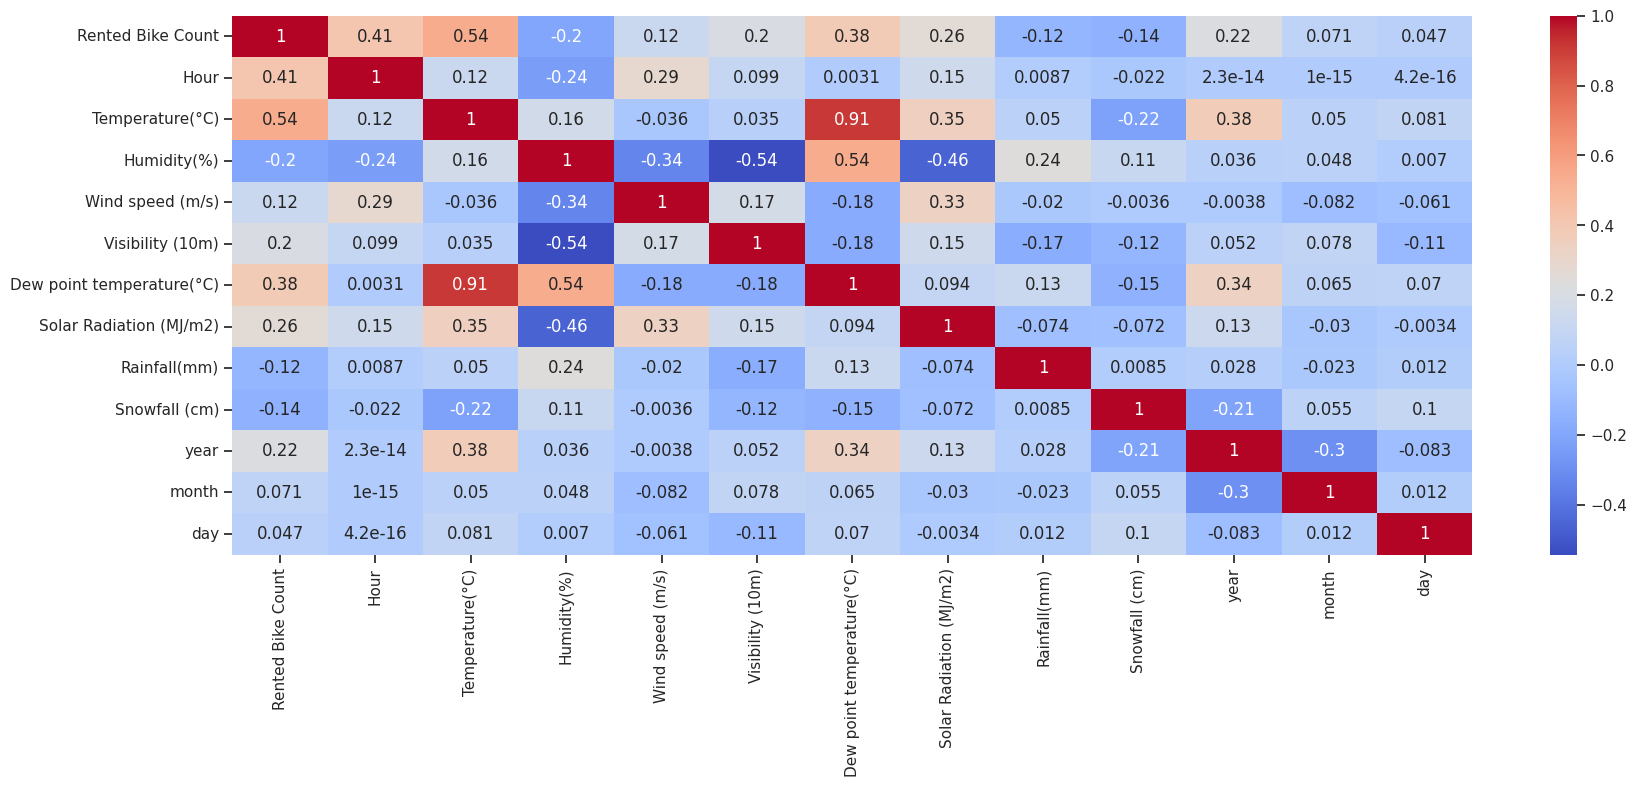

In [40]:
#ploting  the correlation between all the columns using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Here we can easily see about this heat map Rented Bike Count is strongly correlative with Temprature, Dew Point and Hour. And Negative correllative with Humidity, Rainfall and snowfall. and our heatmap showing Temprature and Dew point Temprature strongly correlative each other so we can drop any columns of both.  

In [41]:
#Let drop the Dew Point Temperature column
df =df.drop(["Dew point temperature(°C)"],axis=1)

In [42]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  weekdays  year  month  day  
0  Winter  No Holiday             Yes  Thursday  2017      1   12  
1  Winter  No Holiday             Yes  Thursday  2017      1   12  
2  Winter  No Holiday             Yes  Thursday  2017      1   12  
3  Winter  No Holiday             Yes  Thursday  2017      1   12  
4  Winter  No Holiday             Yes  Thursday  2017      1   12

# **Data Preprocessing and Feature Engineering**

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model.Feature engineering is the process that takes raw data and transforms it into features that can be used to create a predictive model using machine learning.

**Encoding**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  weekdays                 8760 non-null   object 
 13  year                     8760 non-null   int64  
 14  month                   

Now here we can easily see there are four categorical column in our data set so we can convert into integer column.

In [44]:
categorical_feature=["Seasons","weekdays"]

In [45]:
#Let'check holiday column
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Threr are two category in Holiday feature so so we can assign this 0 and 1.

In [46]:
#mapping Holiday column category
df['Holiday'] = df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [47]:
#Let's check functiong day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Here we can see two category available in Functioning day column

In [48]:
#mapping categories in functioning day
df['Functioning Day'] = df['Functioning Day'].map({'No':0, 'Yes':1})

In [49]:
#Let's check seasons column category
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [50]:
#check the weekday column
df['weekdays'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: weekdays, dtype: int64

Here we can see there are four category in seasons column and there are seven category in weekdays column. we can not mapping because season category and weekdays are nominal category, so we will perform one hot encoding

In [51]:
#One Hot Encoding using pandas on both the columns that is Seasons and weekdays
df_seasons = pd.get_dummies(df['Seasons'], drop_first =True)
df_weekdays = pd.get_dummies(df['weekdays'], drop_first=True)

In [52]:
#Now concatinate new dataframe with origional dataframe
df= pd.concat([df,df_seasons,df_weekdays],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekdays                 8760 non-null   object 
 13  year                     8760 non-null   int64  
 14  month                   

After applying one hot encoding we got some integers columns is our data set but still categorical columns are present in our dataset, so we drop them column

In [53]:
df.drop(['Seasons','weekdays'],axis=1, inplace= True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  year                     8760 non-null   int64  
 12  month                    8760 non-null   int64  
 13  day                      8760 non-null   int64  
 14  Spring                  

# ***Train Test Split***

In [55]:
# Now we will apply train test split
X = df.drop(["Rented Bike Count"],axis = 1)
y = df['Rented Bike Count']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (7008, 22)
X_test_shape :  (1752, 22)
y_train_shape :  (7008,)
y_test_shape :  (1752,)


# ***Scaling***

Before applying any machine learning algorithm we need to scale our data, because our data not in a range, after applied our data will come in a range.

In [58]:
#Now do standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# ***Machine Learning Algorithms and Hyperparameter Tuning***

## **Linear Regression**

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The primary goal of linear regression is to find the best-fitting linear equation that predicts the dependent variable based on the values of the independent variables.

In [59]:
#Train Linear Regression Model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_pred



array([ 978.24521382, 1161.14902976, 1311.63891508, ...,  973.88665564,
       -201.46376856, 1349.82169702])

# ***Model Evaluation***

In [60]:
#Evaluate model using mean squared error,mean absolute error and r2 score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 193512.99662765587
RMSE : 439.90112142123013
MAE : 330.88435776243995
R2 : 0.5355460361481215


After applying lineran Regression Algorithm we have 0.53 accuracy which is very bad so we jump to another algorithms.

# ***Regularization***

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

There are two popular regularization techniques used in Linear Regression: Lasso(L1 regularization technique) and Ridge regression(L2 regularization technique). Lasso regression adds a penalty term equal to the absolute value of the coefficients, while Ridge regression adds a penalty term equal to the square of the coefficients. Both techniques help us reduce the impact of irrelevant or redundant features and improve the accuracy of the model.

### **L1 Regularization**

In [61]:
from sklearn.linear_model import Lasso
#L1 regularization (Lasso Regularization)
from sklearn import linear_model
# Create a Lasso regression model with L1 regularization
lasso_reg = Lasso(alpha=0.1)  # You can adjust the alpha value to control the strength of regularization

# Fit the model to the training data
lasso_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred = lasso_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients after L1 regularization
print("Coefficients:", lasso_reg.coef_)

MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")


Mean Squared Error: 193483.41886109379
Coefficients: [ 193.67323192  317.99419063 -165.50988535   17.88425301    5.67167189
  -73.40141029  -65.69847178   10.9372138   -29.70038341  169.91851623
  -26.94668842    1.42584448  -12.9364025   -64.40175221  -70.72143652
 -171.08488766   -5.21064151  -12.07931717  -32.02441185  -12.67975805
  -18.39819529   -3.43993904]
MSE : 193483.41886109379
RMSE : 439.8675014832237
MAE : 330.822944610948
R2 : 0.5356170262684806


## **RandomSearchCV**

In [62]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets

# Create a Ridge regression model
lasso_reg = Ridge()

# Define a distribution of alpha values to sample from
param_dist = {'alpha': np.logspace(-6, 6, num=13)}  # Alpha values from 10^-6 to 10^6

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=lasso_reg, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = random_search.best_params_['alpha']
best_model = random_search.best_estimator_

# Predict using the best model
y_pred_lasso_rendom = best_model.predict(X_test)

# Calculate MSE, RMSE, MAE, R2 Squre error
print("Best Alpha:", {best_alpha})

MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")




Best Alpha: {10.0}
MSE : 193483.41886109379
RMSE : 439.8675014832237
MAE : 330.822944610948
R2 : 0.5356170262684806


In [63]:
# L2 Regularization(Ridge Regression)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Create a Ridge regression model with L2 regularization
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha value

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred = ridge_reg.predict(X_test)

# Calculate the mean squared error
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

# Print the coefficients after L2 regularization
print("Coefficients:", ridge_reg.coef_)

MSE : 193510.52335245447
RMSE : 439.8983102405083
MAE : 330.87530626024727
R2 : 0.5355519722996513
Coefficients: [ 193.62145423  318.40835334 -165.7959006    18.08590688    5.63893626
  -73.7771746   -65.74634877   11.1111095   -29.8431731   170.10147495
  -27.2392356     1.31037597  -13.14358552  -64.75692791  -71.19347416
 -171.50324215   -5.80382483  -12.70426003  -32.65010787  -13.31939073
  -19.02371827   -4.07530385]


## **GridSearchCV**

In [64]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error

# Create a Ridge regression model
ridge_reg = Ridge()

# Define a distribution of alpha values to sample from
param_dist = {'alpha': np.logspace(-6, 6, num=13)}  # Alpha values from 10^-6 to 10^6

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=ridge_reg, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = random_search.best_params_['alpha']
best_model = random_search.best_estimator_

# Predict using the best model
y_pred= best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
R2 = r2_score(y_test,y_pred)
print("r2_score",R2)

Best Alpha: 10.0
Mean Squared Error: 193489.82331941667
r2_score 0.535601654814851


After applying L1 & L2 Regularization and GridSearchCV we did not find any improvement in our model, so we need to do apply more algortihms.

# ***Random Forest Regression***

Random Forest Regression is a machine learning algorithm that combines the principles of both regression analysis and ensemble learning. It is used for predicting numerical or continuous outcomes (regression problems) based on input features



In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split it into features (X) and target values (y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the RandomForestRegressor model
rf_reg = RandomForestRegressor()  # You can adjust parameters

# Train the model on the training set
rf_reg.fit(X_train, y_train)

# Predict target values on the testing set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 45747.53789651826
R-squared: 0.8902005256350553


After applying Random Forest Regression Algorithms we got 0.89 accuracy which is really Good.

### **Cross Validation**

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split it into features (X) and target values (y)

# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the RandomForestRegressor model
rf_reg = RandomForestRegressor()

# Choose a cross-validation strategy (e.g., KFold with 5 folds)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using cross_val_score on the training data
scores = cross_val_score(rf_reg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
# Note: For regression, we often use metrics like negative mean squared error (neg_mean_squared_error)

# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores)
print("Mean CV score:", -np.mean(scores))  # Convert back to positive

# Train the model on the entire training set
rf_reg.fit(X_train, y_train)

# Evaluate the trained model on the testing set
predictions = rf_reg.predict(X_val)

# Evaluate the model's performance on the testing set using regression metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Cross-validation scores: [-40252.58236776 -48830.34803067 -33721.36334408 -49340.36149001
 -41815.87499486 -44620.98015207 -39414.14973338 -54160.37759344
 -39417.276295   -44749.37944471]
Mean CV score: 43632.2693445991
Mean Squared Error: 45299.9759375
R-squared: 0.8912747270042549


So Now we applied RandomForestRegresser we have 89 of accuracy which is good accuracy.

## **RandomizeSearchCV**

"RandomizedSearchCV," is a technique used for hyperparameter tuning in machine learning.

In [75]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_reg = RandomForestRegressor()

# Define a distribution for hyperparameters to sample from
param_dist ={
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 50,150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(rf_reg, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV instance on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_

# Evaluate the best model on the test data
best_model = random_search.best_estimator_
y_pred_rd= best_model.predict(X_test)

# Calculate performance metrics (e.g., R-squared score)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_rd)
print("Best R-squared score:", r2)

Best R-squared score: 0.8828941705183907


After  appying Hyperparameter using RandomizeSearchCV our model will be improved.

# **XGBoost Regresser**

XGBoost is a powerful machine learning algorithm that is used for both classification and regression tasks. It's a type of gradient boosting algorithm, which is an ensemble learning method. XGBoost is designed to produce highly accurate and efficient predictive models.

In [68]:
import xgboost as xgb  # Make sure you have XGBoost installed
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the XGBRegressor model
xgb_reg = xgb.XGBRegressor()
# You can adjust parameters as needed

# Train the model on the training set
xgb_reg.fit(X_train, y_train)

# Predict target values on the testing set
predictions = xgb_reg.predict(X_test)

# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 36802.97428460484
R-squared: 0.9116685308692047


## ***RandomizeSearchCV***

In [69]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create an instance of the XGBRegressor model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define a grid of hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_reg, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Perform the randomized search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Parameters:", best_params)

# Predict target values on the testing set using the best estimator
predictions = best_estimator.predict(X_test)


# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Mean Squared Error: 31198.33563244091
R-squared: 0.9251203231690454


# **Conclusion**


After building a model we found that Linear Regression model is not giving a good accuracy also applying Regularization technique(L1, L2) our model will not be improved .But when we apply Random Forest Regression and XGBoost Regresson Machine Learning algorithm we found that Random Forest Regression is giving 89% accuracy andXGB regressor is giving us 91% of accuracy, after applying randomizeSearchCV our model improved which is good in our prediction.

So, we successfully developed and fine-tuned a machine learning model for bike sharing demand prediction. The model's robust performance, insightful feature importance analysis, and actionable recommendations showcase its potential to enhance operational efficiency and user experience for bike sharing companies. By addressing its limitations and continuing to refine its performance, our model can contribute to the growth and success of bike sharing services in urban environments.

